In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier  
#from sklearn.tree import DecisionTreeRegressor   
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [11]:
df=pd.read_csv("E:/NTI/tennis.csv")
print(df.shape)
df.head()

(14, 5)


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['outlook'] = le.fit_transform(df['outlook'])
df['temp'] = le.fit_transform(df['temp'])
df['humidity'] = le.fit_transform(df['humidity'])
df['windy'] = le.fit_transform(df['windy'])
df['play'] = le.fit_transform(df['play'])


In [15]:
X=df.iloc[:,0:4]
X

,outlook,temp,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0
5,1,0,1,1
6,0,0,1,1
7,2,2,0,0
8,2,0,1,0
9,1,2,1,0


In [16]:
y=df.iloc[:,4]
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int32

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

model = DecisionTreeClassifier(
    criterion='entropy',       
    max_depth=4,
    min_samples_split=2,
    random_state=42
)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [21]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

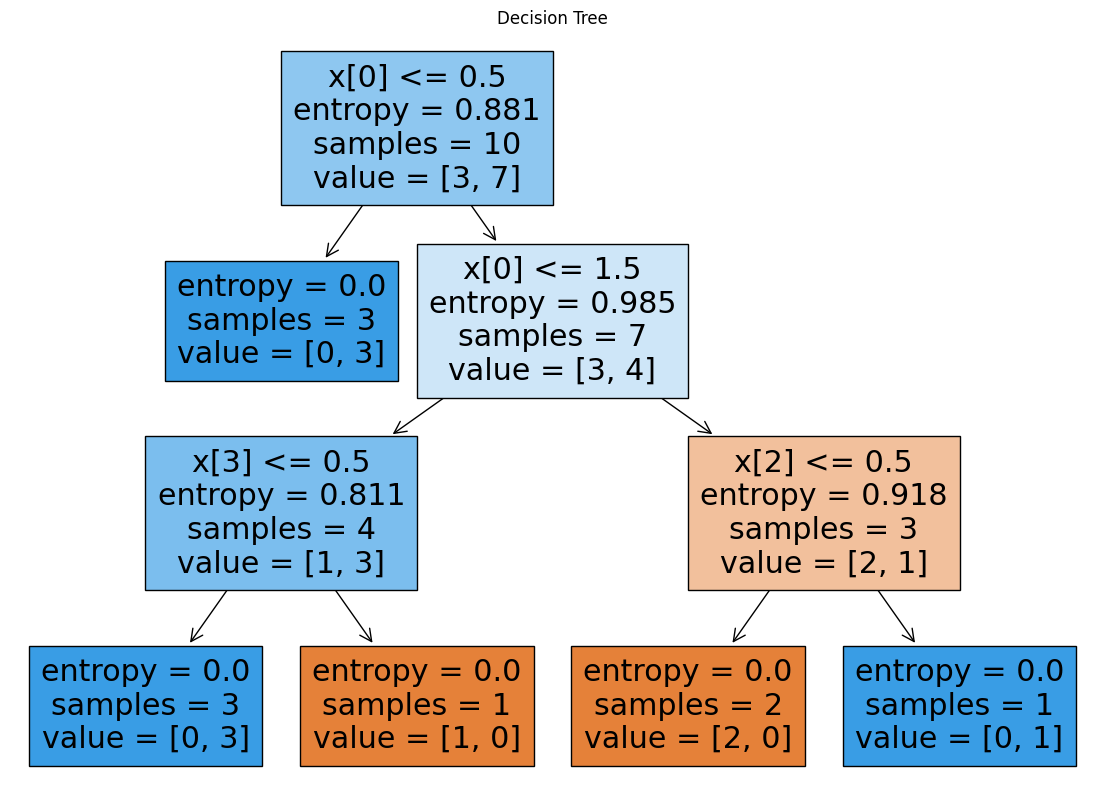

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10)) 
tree.plot_tree(
    model,
    filled=True,                       #  
  
)
plt.title("Decision Tree")
plt.show()